In [1]:
import numpy as np
import os 
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as shc
%matplotlib inline

In [3]:
## Data loading 

trainData = "../Data/HC"

new_train = []
image_names = []

# Test on 1000 images
for filename in os.listdir(trainData):
    if filename.endswith('.tif'):
        image = Image.open(os.path.join(trainData, filename)) 
        new_train.append(np.asarray( image, dtype="uint8" ))
        image_names.append(filename)

meanMatrix = np.asarray(new_train)

In [4]:
X = meanMatrix.reshape((1575,-1))
X.shape

(1575, 27648)

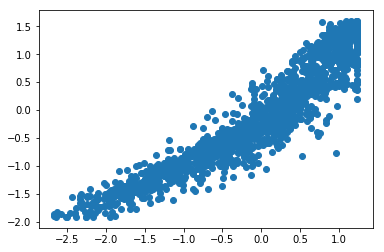

In [5]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(X)
plt.scatter(scaledData[:,0], scaledData[:,1])


In [6]:
n_clusters = 6
HC = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
HC.fit(scaledData)
labels = HC.labels_
# dend = shc.dendrogram(shc.linkage(scaledData, method='ward'))

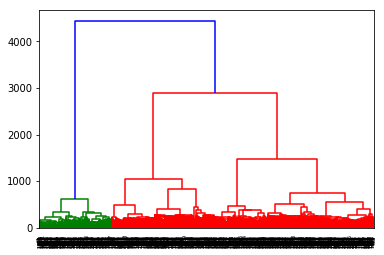

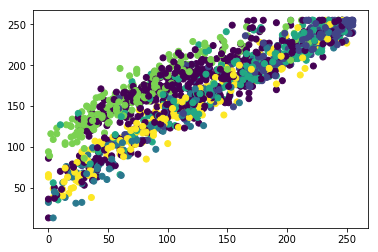

In [8]:
# plt.scatter(scaledData[labels==0, 0], scaledData[labels==0, 1], s=50, marker='o', color='red')
# plt.scatter(scaledData[labels==1, 0], scaledData[labels==1, 1], s=50, marker='o', color='blue')

# LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 : 'g', 3 : 'c'} 

# label_color = [LABEL_COLOR_MAP[l] for l in labels]

plt.scatter(X[:,1], X[:,2], c=labels) 

In [9]:
def symlink_rel(src, dst):
    rel_path_src = os.path.relpath(src, os.path.dirname(dst))
    os.symlink(rel_path_src, dst)

def clusterintoDirectories():
    directory = trainData
    sub_directories = [str(cluster) for cluster in set(labels)]

    for filename in os.listdir(directory):
        if filename.endswith('.tif'):
            for cluster in sub_directories: # count of distinct elements = no. of clusters
                os.makedirs(directory + '/{}'.format(cluster) , exist_ok=True)

    for i in range(len(image_names)):
        # if there isnt already a symlink of this image in the coressponding subdirectory
        if image_names[i] not in os.listdir(directory + '/' + sub_directories[labels[i]]): 
            symlink_rel(directory + '/{}'.format(image_names[i]) , 
                       directory + '/{}'.format(labels[i]) + '/' + image_names[i])
        

In [10]:
clusterintoDirectories()